## <cr>ML HW4</cr>
### Fu Shang(fs1520@nyu.edu)

### 2 Kernel Matrices

#### 2.1

For $S=\{x_{1},\dots,x_{m}\}$, we get $X$:

$$X=\left\{ \begin{array}{ll}
    x_{1}^{T} \\
    \vdots \\
    x_{m}^{T}
\end{array}\right\}$$

So $K=XX^{T}$:

$$K=\left\{ \begin{array}{ll}
    x_{1}^{T}x_{1}&\dots& x_{1}^{T}x_{m}\\
    \vdots&\ddots&\vdots \\
    x_{m}^{T}x_{1}&\dots&x_{m}^{T}x_{m}
\end{array}\right\}$$

In which $K_{i,j}$ is inner product of $x_{i}$ and $x_{j}$.

So for any vector $x_{i}$, its lengths could be expressed as:

$$||x_{i}||=\sqrt{K_{i,i}}$$

and for any two vectors $x_{i}$ and $x_{j}$, their pairwise distance could be expressed as:

$$d(x_{i},x_{j})=||x_{i}-x_{j}||=\sqrt{(x_{i}^{T}-x_{j}^{T})(x_{i}-x_{j})}=\sqrt{x_{i}^{T}x_{i}-2x_{i}^{T}x_{j}+x_{j}^{T}x_{j}}$$

i.e.

$$d(x_{i},x_{j})=\sqrt{K_{i,i}+K_{j,j}-2K_{i,j}}$$

Thus we obtained the conclusion we want.

### 3. Kernel Ridge Regression

#### 3.1

Proof: 

Rewrite $J(w)$ as:

$$J(w)=(Xw-y)^{T}(Xw-y)+\lambda{w^{T}}w
=w^{T}X^{T}Xw-2w^{T}X^{T}y+y^{T}y+\lambda{w^{T}}w$$

To minimize $J(w)$, derive with respect to $w$ and make it zero:

$$J'(w)=2X^{T}Xw-2X^{T}y+2\lambda{w}=0\Rightarrow{X^{T}Xw+\lambda{w}=X^{T}y}$$

For any $\lambda>0$, since $X^{T}X$ positive semi-definite, $X^{T}X+\lambda{I}$ is positive definite since all eigenvalues greater than zero. So $X^{T}X+\lambda{I}$ is invertible, and thus minimizer of $J(w)$ is:

$$w=(X^{T}X+\lambda{I})^{-1}X^{T}y$$

#### 3.2

$${X^{T}Xw+\lambda{w}=X^{T}y}\Rightarrow{}\lambda{w}=X^{T}y-X^{T}Xw\Rightarrow{w}=\frac{1}{\lambda}(X^{T}y-X^{T}Xw)$$

So

$${w}=X^{T}\frac{1}{\lambda}(y-Xw)=X^{T}\alpha$$

To satisfy the equation above, $\alpha$ should be like:

$$\alpha=y^{T}((X^{T}X+\lambda{I})^{-1})^{T}$$

#### 3.3

Since w could be expressed as a linear combination of the data vectors, so it is in the span of the data.

#### 3.4 

As proved above, $\alpha$ should satisfy:

$$\alpha=\frac{1}{\lambda}(y-Xw)$$

Replace $w$ by $X^{T}\alpha$, and notice that $y$ is a column vector, we can get:

$$\alpha=(\lambda{I}+XX^{T})^{-1}y$$

#### 3.5

$$Xw=XX^{T}\alpha=XX^{T}(\lambda{I}+XX^{T})^{-1}y$$

#### 3.6

Set

$$k_{x}=\left(\begin{array}{ll}x^{T}x_{1} \\ \vdots \\ x^{T}x_{n} \end{array}\right)$$

So we get

$$f(x)=x^{T}w*=x^{T}X^{T}\alpha=k_{x}(\lambda{I}+XX^{T})^{-1}y$$

in which $XX^{T}$ is the kernel.

### 4 

### 5 Kernelized Pegasos

#### 5.1

Obviously, the $j$th row of K is:

$$K_{j}=\left(\begin{array}{ll} x_{1}^{T}x_{j}, \dots ,x_{n}^{T}x_{j}\end{array}\right)$$

So

$$y_{j}\langle{}w^{(t)},x_{j}\rangle=y_{j}\sum_{i=1}^{n}a_{i}^{(t)}x_{i}^{T}x_{j}=y_{j}K_{j}a^{(t)}$$

#### 5.2

Since $(x_{j},y_{j})$ does not have margin violation, we also suppose that it was not misclassified according to current known conditions.

So

$$w^{t+1}=(1-\eta^{t}\lambda)w^{t}=\sum_{i=1}^{n}\alpha_{i}^{t+1}x_{i}$$

We get

$$\alpha_{i}^{(t+1)}=(1-\eta^{t}\lambda)\alpha_{i}^{(t)}=(1-\frac{1}{t})\alpha_{i}^{(t)}$$

for any $i\in[1,\dots,n]$


#### 5.3

$(x_{j},y_{j})$ has a margin violation means $w^{(t+1)}$ should be updated with $x_{j}$.

$$w^{(t+1)}=(1-\eta^{(t)}\lambda)w^{(t)}+\eta^{(t)}y_{j}x_{j}$$

So

$$\alpha_{i}^{(t+1)}=(1-\frac{1}{t})\alpha_{i}^{(t)}$$

for $i\in[1,\dots,n]$, and

$$\alpha_{j}^{(t+1)}=\frac{1}{t\lambda}y_{j}$$

After update, $\alpha\in{R^{n+1}}$

We can get the kernelized Pegasos:


Algorithm: Kernelized Pegasos<br>
    &emsp;input: Training set $(x_{i},y_{i}),\dots,(x_{n},y_{n}) \in R_{d}\times{}\{-1,1\},\lambda>0, K$<br>
    &emsp;$w^{1}=(0,\dots,0)\in{}R^{d}$<br>
    &emsp;$t=0$<br>
    &emsp;repeat<br>
    &emsp;&emsp;t=t+1<br>
    &emsp;&emsp;$\eta^{t}=1/(t\lambda)$<br>
    &emsp;&emsp;$\alpha^{(0)}=(\lambda{I}+K)^{-1}y$
    &emsp;&emsp;randomly choose j in $1,\dots,n$<br>
    &emsp;&emsp;if $y_{j}K_{j}a^{(t)}<1$<br>
    &emsp;&emsp;&emsp;$\alpha_{i}^{(t+1)}=(1-\frac{1}{t})\alpha_{i}^{(t)}$<br>
    &emsp;&emsp;&emsp;$\alpha_{j}^{(t+1)}=\frac{1}{t\lambda}y_{j}$<br>
    &emsp;&emsp;&emsp;$w^{(t+1)}=\sum_{i=1}^{n}\alpha_{i}^{(t+1)}x_{i}+\alpha_{j}^{(t+1)}x_{j}$<br>
    &emsp;&emsp;else<br>
    &emsp;&emsp;&emsp;$\alpha_{i}^{(t+1)}=(1-\frac{1}{t})\alpha_{i}^{(t)}$<br>
    &emsp;&emsp;&emsp;$w^{(t+1)}=\sum_{i=1}^{n}\alpha_{i}^{(t+1)}x_{i}$<br>
    &emsp;undil bored<br>
    &emsp;return $w^{(t)}$
    
    


### 6 Kernel Methods

#### 6.1
#### 6.2

##### 6.2.1 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.spatial.distance as distance
import functools

%matplotlib inline

In [2]:
### Kernel function generators
def linear_kernel(X1, X2):
    """
    Computes the linear kernel between two sets of vectors.
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
    Returns:
        matrix of size n1xn2, with x1_i^T x2_j in position i,j
    """
    return np.dot(X1,np.transpose(X2))
 
def RBF_kernel(X1,X2,sigma):
    """
    Computes the RBF kernel between two sets of vectors   
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
        sigma - the bandwidth (i.e. standard deviation) for the RBF/Gaussian kernel
    Returns:
        matrix of size n1xn2, with exp(-||x1_i-x2_j||^2/(2 sigma^2)) in position i,j
    """
    c=np.shape(X1)[1]
    r1=np.shape(X1)[0]
    r2=np.shape(X2)[0]
    RBF=np.zeros([r1,r2])
    if c==1:
        for i in range(r1):
            for j in range(r2):
                RBF[i][j]=np.exp(-(X1[i]-X2[j])**2/(2*sigma**2))
    else:
        for i in range(r1):
            for j in range(r2):
                RBF[i][j]=np.exp(-distance.cdist(X1[i],X2[j],'sqeuclidean')/(2*sigma**2))
            
    return(RBF)
    

def polynomial_kernel(X1, X2, offset, degree):
    """
    Computes the inhomogeneous polynomial kernel between two sets of vectors
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
        offset, degree - two parameters for the kernel
    Returns:
        matrix of size n1xn2, with (offset + <x1_i,x2_j>)^degree in position i,j
    """
    r1=np.shape(X1)[0]
    r2=np.shape(X2)[0]
    c=np.shape(X1)[1]
    RBF=np.zeros([r1,r2])
    for i in range(r1):
        for j in range(r2):
            RBF[i][j]=(offset+np.dot(X1[i],X2[j]))**degree
            
    return(RBF)


#### 6.2

In [5]:
X0=np.array([-4,-1,0,2]).reshape(-1,1)
Kernel=linear_kernel(X0,X0)
print(Kernel)

[[16  4  0 -8]
 [ 4  1  0 -2]
 [ 0  0  0  0]
 [-8 -2  0  4]]


#### 6.3

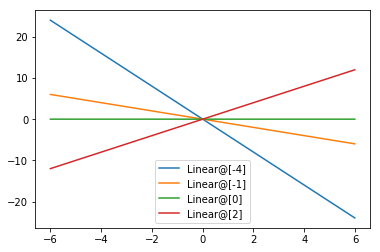

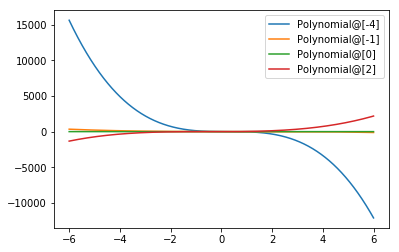

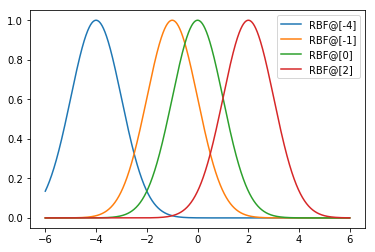

In [6]:
plot_step = .01
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)

# Linear kernel
y = linear_kernel(prototypes, xpts) 
for i in range(len(prototypes)):
    label = "Linear@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 

# polynomial kernel
y = polynomial_kernel(prototypes, xpts,1,3) 
for i in range(len(prototypes)):
    label = "Polynomial@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 

# RBF kernel
y = RBF_kernel(prototypes, xpts,1) 
for i in range(len(prototypes)):
    label = "RBF@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 

In [3]:
class Kernel_Machine(object):
    def __init__(self, kernel, prototype_points, weights):
        """
        Args:
            kernel(X1,X2) - a function return the cross-kernel matrix between rows of X1 and rows of X2 for kernel k
            prototype_points - an Rxd matrix with rows mu_1,...,mu_R
            weights - a vector of length R with entries w_1,...,w_R
        """

        self.kernel = kernel
        self.prototype_points = prototype_points
        self.weights = weights
        
    def predict(self, X):
        """
        Evaluates the kernel machine on the points given by the rows of X
        Args:
            X - an nxd matrix with inputs x_1,...,x_n in the rows
        Returns:
            Vector of kernel machine evaluations on the n points in X.  Specifically, jth entry of return vector is
                Sum_{i=1}^R w_i k(x_j, mu_i)
        """
        Vec=np.dot(self.weights,self.kernel(self.prototype_points,X))
   
        return(Vec)

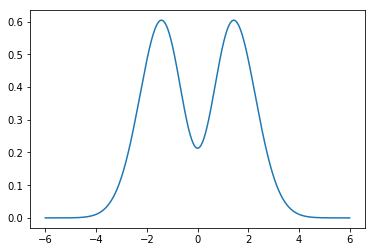

In [5]:
weights=np.array([1,-1,1])
plot_step = .01
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)
protos=np.array([-1,0,1]).reshape(-1,1)
sigma=1
k = functools.partial(RBF_kernel, sigma=sigma)
f = Kernel_Machine(k,protos,weights)
label = "Sigma="+str(sigma)
plt.plot(xpts, f.predict(xpts), label=label)
plt.show()

In [6]:
data_train,data_test = np.loadtxt("krr-train.txt"),np.loadtxt("krr-test.txt")
x_train, y_train = data_train[:,0].reshape(-1,1),data_train[:,1].reshape(-1,1)
x_test, y_test = data_test[:,0].reshape(-1,1),data_test[:,1].reshape(-1,1)

In [5]:
def train_kernel_ridge_regression(X, y, kernel, l2reg):
    alpha=np.dot(np.linalg.inv(l2reg*np.eye(X.shape[0])+kernel(X,X)),y).reshape(-1)
    return Kernel_Machine(kernel, X, alpha)

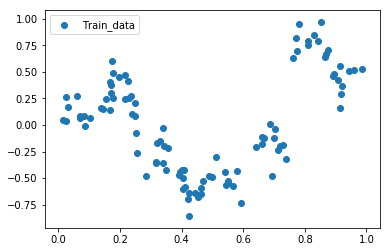

In [13]:
label='Train_data'
plt.scatter(x_train, y_train, label=label)
plt.legend(loc='upper left')
plt.show()

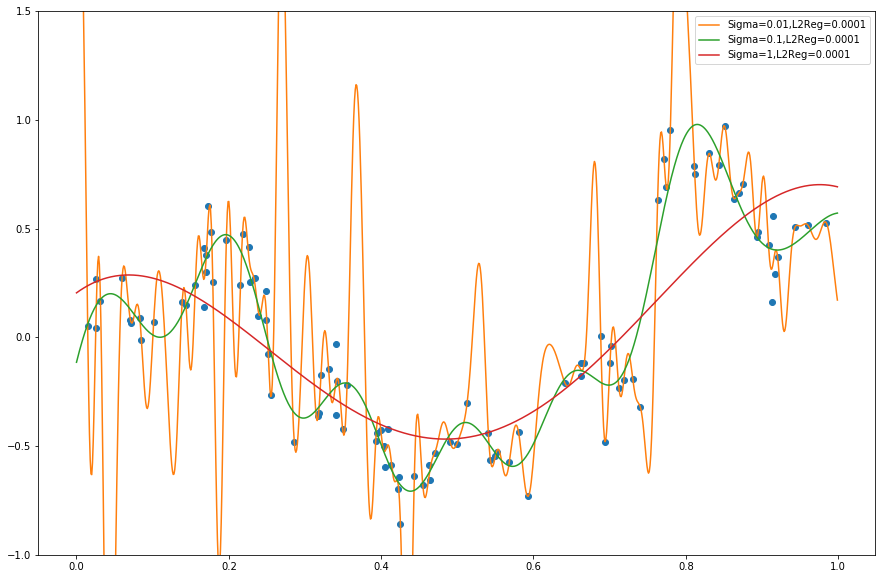

In [81]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
fig,ax=plt.subplots(figsize=(15,10))
lines=locals()
lines['Ori data'],=ax.plot(x_train,y_train,'o')
l2reg = 0.0001
for sigma in [.01,.1,1]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    lines[label],=ax.plot(xpts, f.predict(xpts), label=label)
ax.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

Answer:

A too small Sigma seems more likely to verfit, since when Sigma=0.01, the fluctuation of curve gets too large. With this dataset, a Sigma too big i.e. Sigma=1 shows under fit. Sigma=0.1 has less over fit than 0.01 and shows satisfying accuracy.

#### 6.3.4

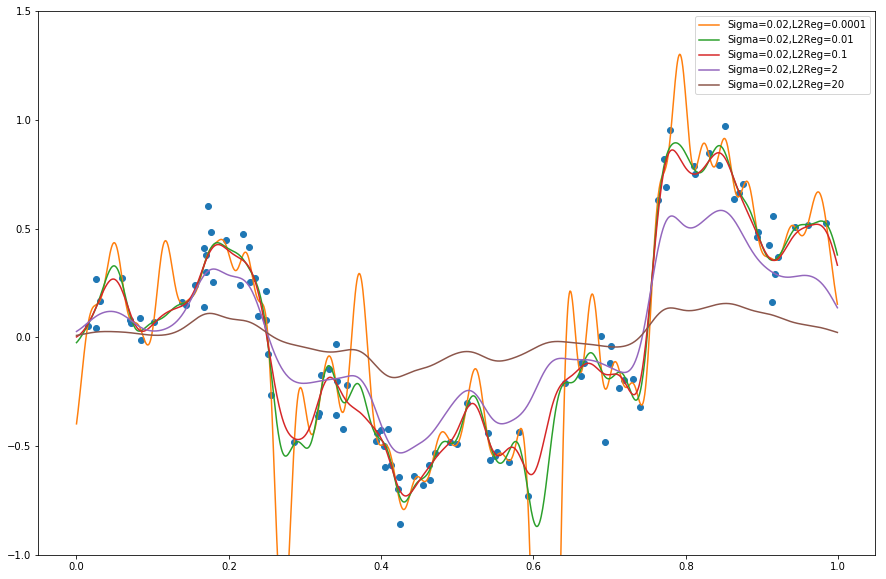

In [83]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
fig,ax=plt.subplots(figsize=(15,10))
lines=locals()
lines['Ori data'],=ax.plot(x_train,y_train,'o')
sigma= 0.02
for l2reg in [.0001,.01,.1,2,20]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    lines["Sigma="+str(sigma)+",L2Reg="+str(l2reg)],=ax.plot(xpts, f.predict(xpts), label=label)
ax.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

Answer:

The prediction function turns into a straight line when $\lambda\rightarrow\infty$

#### 6.3.5

In [7]:
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin

class KernelRidgeRegression(BaseEstimator, RegressorMixin):  
    """sklearn wrapper for our kernel ridge regression"""
     
    def __init__(self, kernel="RBF", sigma=1, degree=2, offset=1, l2reg=1):        
        self.kernel = kernel
        self.sigma = sigma
        self.degree = degree
        self.offset = offset
        self.l2reg = l2reg 

    def fit(self, X, y=None):
        """
        This should fit classifier. All the "work" should be done here.
        """
        if (self.kernel == "linear"):
            self.k = linear_kernel
        elif (self.kernel == "RBF"):
            self.k = functools.partial(RBF_kernel, sigma=self.sigma)
        elif (self.kernel == "polynomial"):
            self.k = functools.partial(polynomial_kernel, offset=self.offset, degree=self.degree)
        else:
            raise ValueError('Unrecognized kernel type requested.')
        
        self.kernel_machine_ = train_kernel_ridge_regression(X, y, self.k, self.l2reg)

        return self

    def predict(self, X, y=None):
        try:
            getattr(self, "kernel_machine_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")

        return(self.kernel_machine_.predict(X))

    def score(self, X, y=None):
        # get the average square error
        return((self.predict(X)-y).mean()) 

In [13]:
from sklearn.model_selection import GridSearchCV,PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error,make_scorer
import pandas as pd
    
test_fold = [-1]*len(x_train) + [0]*len(x_test)   #0 corresponds to test, -1 to train
predefined_split = PredefinedSplit(test_fold=test_fold)

In [39]:
param_grid = [{'kernel': ['RBF'],'sigma':[.01,.02,.05], 'l2reg': np.exp2(np.arange(-7,0,1))},
              {'kernel':['polynomial'],'offset':[-6.5,-6,-5.5,-5,-4,-3], 'degree':[14,15,16],'l2reg':[0.005,0.003,0.002,0.001,0.0007] },
              {'kernel':['linear'],'l2reg': [100,10,1,.01,.001]}]
kernel_ridge_regression_estimator = KernelRidgeRegression()
grid = GridSearchCV(kernel_ridge_regression_estimator, 
                    param_grid,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False)
                  # n_jobs = -1  #should allow parallelism, but crashes Python on my machine
                   )
grid.fit(np.vstack((x_train,x_test)),np.vstack((y_train,y_test))) 

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise',
       estimator=KernelRidgeRegression(degree=2, kernel='RBF', l2reg=1, offset=1, sigma=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['RBF'], 'sigma': [0.01, 0.02, 0.05], 'l2reg': array([ 0.00781,  0.01562,  0.03125,  0.0625 ,  0.125  ,  0.25   ,  0.5    ])}, {'kernel': ['polynomial'], 'offset': [-6.5, -6, -5.5, -5, -4, -3], 'degree': [14, 15, 16], 'l2reg': [0.005, 0.003, 0.002, 0.001, 0.0007]}, {'kernel': ['linear'], 'l2reg': [100, 10, 1, 0.01, 0.001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)

In [40]:
pd.set_option('display.max_rows', 100)
df = pd.DataFrame(grid.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df['mean_test_score'] = -df['mean_test_score']
df['mean_train_score'] = -df['mean_train_score']
cols_to_keep = ["param_degree", "param_kernel","param_l2reg" ,"param_offset","param_sigma",
        "mean_test_score","mean_train_score"]
df_toshow = df[cols_to_keep].fillna('-')
df_toshow.sort_values(by=["param_kernel","mean_test_score"])

C:\Applications\Programming\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Applications\Programming\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Applications\Programming\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
20,-,RBF,0.500000,-,0.05,0.013975,0.014918
17,-,RBF,0.250000,-,0.05,0.014053,0.013352
14,-,RBF,0.125000,-,0.05,0.014857,0.012425
11,-,RBF,0.062500,-,0.05,0.015869,0.011751
19,-,RBF,0.500000,-,0.02,0.015909,0.011273
16,-,RBF,0.250000,-,0.02,0.016277,0.009212
8,-,RBF,0.031250,-,0.05,0.016836,0.011219
5,-,RBF,0.015625,-,0.05,0.017617,0.010819
13,-,RBF,0.125000,-,0.02,0.017811,0.008378
2,-,RBF,0.007812,-,0.05,0.018124,0.010511


RBF: l2reg=0.5, Sigma=0.05, test_loss=0.013975;

Linear: l2reg=1, test_loss=0.164540;

Polynomial: degree=14, offset=-6, l2reg=0.001, test_loss=0.024863	;

With large enough search range for each parameter, we can see in the table that for each parameter, changes in either direction will cause performance to get worse.

#### 6.3.6

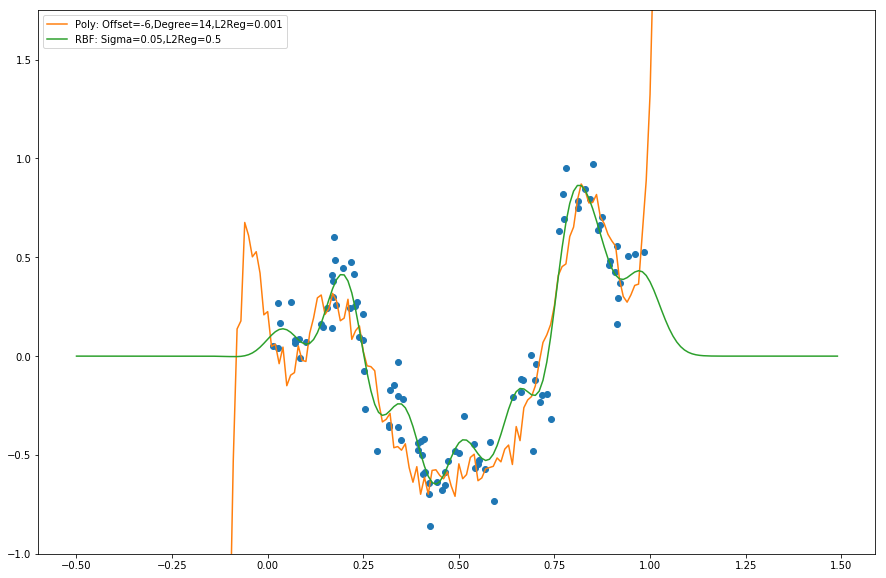

In [42]:
## Plot the best polynomial and RBF fits you found
plot_step = .01
xpts = np.arange(-.5 , 1.5, plot_step).reshape(-1,1)

#Plot best polynomial fit
offset= -6
degree = 14
l2reg = 0.001
lines=locals()
fig,ax=plt.subplots(figsize=(15,10))
lines['train']=ax.plot(x_train,y_train,'o')
k = functools.partial(polynomial_kernel, offset=offset, degree=degree)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = 'Poly: '+"Offset="+str(offset)+",Degree="+str(degree)+",L2Reg="+str(l2reg)
lines[label],=ax.plot(xpts, f.predict(xpts), label=label)

#Plot best RBF fit
sigma = 0.05
l2reg= 0.5
k = functools.partial(RBF_kernel, sigma=sigma)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = 'RBF: '+"Sigma="+str(sigma)+",L2Reg="+str(l2reg)
lines[label],=ax.plot(xpts, f.predict(xpts), label=label)

ax.legend(loc = 'best')
plt.ylim(-1,1.75)
plt.show()

Comments:
    
The polynomial kernel is somehow over fit on this dataset with a high power (around 14), but performs far better than linear kernel. The RBF shows best performance on this dataset and the shape of curve is also much smoother which means low highest power and low over fit.

#### 6.3.7

To minimize the risk, the Bayes decision function should satisfy:
    
$$f^{*}(x)=E(y|X)=E((f(x)+\epsilon)|X)=E(f(x)|X)=f(x)$$

For the Bayes risk, we have:

$$R(x,f^{*})=E(E(l))=E(E(Y-f(X))^{2})=E(E((y-f(x))|x))=E(\epsilon^{2})=\mu^{2}(\epsilon)+\sigma^{2}(\epsilon)=0.1^{2}$$

### 7 Representer Theorem

#### 7.1

Assume that $||m_{0}||=||x|| \& m_{0}\ne{x}$

So we have $x-m_{0}\ne{0}\Rightarrow||x-m_{0}||^{2}>0$

Set $||x-m_{0}||^{2}>0$ as $\Delta^{2}$, we get $||x||^{2}=||m_{0}||^{2}+\Delta^{2}>||m_{0}||^{2}$

Since $||x||>0$ and $||m_{0}||>0$, we can get the square root and unequality holds:

$$||x||>||m_{0}||$$

So we can get $||x||=||m_{0}||$ only if $m_{0}=x$.

#### 7.2

Proof:

For a specific $w^{*}$, consider its projection on the subspace M, for which M is defined as:

$$span\{\psi(x_{i}), i\in[1,\dots,n]\}$$

So we can separate $w^{*}$ into two items:

$$w^{*}=w_{\parallel}+w_{\perp}$$

For the loss item in $J(w)$, its value is only related to the parallel item in $w$. So consider the $||w^{*}||$

$||w^{*}||\ge||w_{\parallel}||$ equality holds only when $w_{\perp}=0$.

Since $R$ is strictly monotonically increasing, we can get $R(||w^{*}||)>R(||w_{\parallel}||)$ if $w_{\perp}\ne{0}$. Since $w_{\perp}$ has no contribution to minimize the loss item, it will be minimized to $0$ by $R$.

So for all minimizers $w^{*}$, the form $w^{*}=\sum_{i=1}^{n}\alpha_{i}\psi(x_{i})$ must be followed.

### 8 Ivanov and Tikhonov Regularization

#### 8.1.1 Tikhonov optimal implies Ivanov optimal

Set $f^{*}$ as a Tikhonov solution, we get for $\forall{f\in{F}}$, $\phi{(f^{*})}+\lambda\Omega(f^{*})\le{}\phi{(f)}+\lambda\Omega(f)$

Set $r=\Omega{(f^{*})}$

Assume $f^{*}$ is not an Ivanov solution whose $r=\Omega{(f^{*})}$, i.e. $\exists{f^{*'}}$ for which $\phi{(f^{*'})}<\phi{(f^{*})}$ s.t. $\Omega{(f^{*'})}\le\Omega{(f^{*})}$. 

So we can get 

$$\phi{(f^{*'})}+\lambda\Omega(f^{*'})<\phi{(f^{*})}+\lambda\Omega(f^{*})$$

This means $f^{*}$ is not a Tikhonov solution.

So $f^{*'}$ does not exist and for every Tikhonov solution for some $\lambda$, it's also an Ivanov solution for some $r$.

#### 8.2.1

$$L(w,\lambda)=\phi{(w)}+\lambda{}(\Omega(w)-r)$$

#### 8.2.2

Optimization problem:

Maximize $g(\lambda)$ s.t. $\lambda\ge0$

For which

$$g(\lambda)=inf_{w\in{}R^{d}}L(w,\lambda)=inf_{w\in{}R^{d}}(\phi(w)+\lambda{}(\Omega(w)-r))$$

#### 8.2.3

Since for any $w$, we have $\phi(w)\ge{}g(\lambda)$, i.e. for a $\lambda^{*}$ maximizes $g$, $g(\lambda^{*})$ is a lower bound of $\phi(w)$.

Since we have strong duality of the original dual problem, i.e.:

$$\phi(w^{*})=g(\lambda^{*})$$

equality reaches at $w^{*}$, means $\phi(w)$ reaches lower bound at $w^{*}$, i.e. minimum in expression for $g(\lambda^{*})$ attains at $w^{*}$.

More specificly, since

$$\phi(w^{*})=g(\lambda^{*})=inf_{w}(\phi(w)+\lambda{}(\Omega(w)-r))\le{}(\phi(w^{*})+\lambda{}(\Omega(w^{*})-r))\le\phi(w^{*})$$

we can get the conclusion:

$w^{*}$ is minimizer for $L(w,\lambda^{*})$, thus we get:

$$w^{*}\in{}argmin_{w\in{}R^{d}}[\phi(w)+\lambda^{*}\Omega(w)]$$

#### 8.3.1

The gradient of Ridge Regression is:

$$g(w)=\frac{\partial{f(w)}}{\partial{w}}=\sum{}x_{i}(w^{T}x_{i}-y_{i})$$

It only has 1 possible extreme point at $w|w_{i}=\frac{y_{i}}{x_{i}}$. So we can get a strictly feasible point at $w|w_{i}=\frac{y_{i}}{x_{i}}$ if $r\ge\sum\frac{y_{i}^{2}}{x_{i}^{2}}$, or at the lowest value point on intersection of $||w||^{2}=r$ and the Ridge Regression hyperplane if $0\le{}r\le\sum\frac{y_{i}^{2}}{x_{i}^{2}}$.

So Ivanov and Tikhonov form of RR are equivalent when $r\ge0$.